## K nearest neighbour

In [1]:
import pandas as pd

In [39]:
ts=pd.read_csv('Shirt.csv')
ts

,Height,weight,Tshirtsize
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,163,60,M
5,163,60,M
6,160,61,M
7,163,64,M
8,163,64,L
9,165,61,L


In [40]:
ts.head()
    

,Height,weight,Tshirtsize
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,163,60,M


In [41]:
Height=[158,158,158,160,163,163,160,163,163,165,165,168,168,170,170]
weight=[58,59,63,59,60,60,61,64,64,61,62,65,62,63,66]
h1=161
w1=61
ts1=[]
ts2=[]
for i in Height:
    ts1.append(h1-i)

for j in weight:
    ts2.append(w1-j)
print(ts1)
print(ts2)

[3, 3, 3, 1, -2, -2, 1, -2, -2, -4, -4, -7, -7, -9, -9]
[3, 2, -2, 2, 1, 1, 0, -3, -3, 0, -1, -4, -1, -2, -5]


In [42]:
l=[]
for i in range(0,len(Height)):
    d=(((Height[i]-h1)**2)+((weight[i]-w1)**2))**0.5
    l.append(d)
l

[4.242640687119285,
 3.605551275463989,
 3.605551275463989,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 1.0,
 3.605551275463989,
 3.605551275463989,
 4.0,
 4.123105625617661,
 8.06225774829855,
 7.0710678118654755,
 9.219544457292887,
 10.295630140987]

In [43]:
import numpy as np
h=np.array(Height)
w=np.array(weight)
np.sqrt(((h-h1)**2)+((w-w1)**2))


array([ 4.24264069,  3.60555128,  3.60555128,  2.23606798,  2.23606798,
        2.23606798,  1.        ,  3.60555128,  3.60555128,  4.        ,
        4.12310563,  8.06225775,  7.07106781,  9.21954446, 10.29563014])

In [53]:
shirt=pd.DataFrame({'Height':Height,'weight':weight,'size':size})
shirt

NameError: name 'size' is not defined

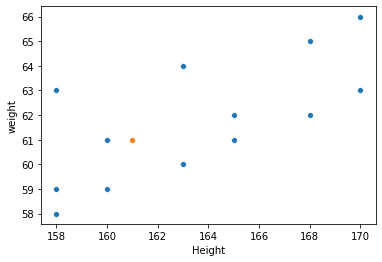

In [54]:
import seaborn as sns
sns.scatterplot(x=shirt['Height'],y=shirt['weight'])
sns.scatterplot(x=[161],y=[61])

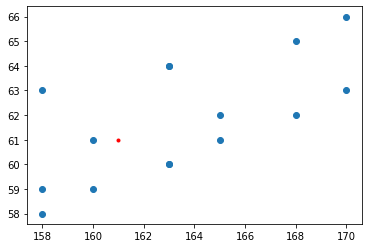

In [55]:
import matplotlib.pyplot as plt
plt.scatter(shirt['Height'],shirt['weight'])
plt.scatter(161,61,color='r',marker='.')

In [60]:
X=ts[['Height','weight']]
Y=ts['Tshirtsize']
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
knn.predict([[161,61]])

array(['M'], dtype=object)

In [62]:
from sklearn.metrics import accuracy_score
Y_pred=knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

1.0

In [73]:
hd=pd.read_csv('Heart_disease.csv',index_col=0)
hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [74]:
hd.shape

(303, 14)

In [75]:
hd.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [76]:
hd.duplicated()

1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
303    False
Length: 303, dtype: bool

In [77]:
hd.duplicated().sum()

0

In [78]:
hd['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [79]:
hd.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [80]:
hd.dropna(inplace=True)
hd.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [81]:
hd.shape

(297, 14)

In [83]:
from sklearn.preprocessing import LabelEncoder
lbc=LabelEncoder()
hd['ChestPain']=lbc.fit_transform(hd['ChestPain'])


In [84]:
hd['Thal']=lbc.fit_transform(hd['Thal'])

In [85]:
hd['AHD']=lbc.fit_transform(hd['AHD'])

In [86]:
hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [87]:
X=hd.drop('AHD',axis=1)
Y=hd['AHD']

## APPLYING LOGISTIC REGRESSION , KNN and Find Accuracy

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [89]:
X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1


In [90]:
X_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
271,61,1,0,140,207,0,2,138,1,1.9,1,1.0,2
38,57,1,0,150,276,0,2,112,1,0.6,2,1.0,0
17,48,1,2,110,229,0,0,168,0,1.0,3,0.0,2
257,67,0,0,106,223,0,0,142,0,0.3,1,2.0,1
146,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1


In [91]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
Y_pred=lg.predict(X_test)

In [94]:
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1])

In [95]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(Y_pred,Y_test)
c

array([[45,  8],
       [ 4, 33]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.8666666666666667

In [97]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
from sklearn.metrics import accuracy_score
Y_pred=knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6888888888888889